---
---

<br>
<br>

# `# Logistic Regression with MNIST Dataset:) `

<br>
<br>

---
---

In [39]:

import time 
import torch 
import torch.nn as nn
from torchinfo import summary
import torch.nn.functional as F 
import matplotlib.pyplot as plt 
from torchvision import datasets,transforms
from torch.utils.data import DataLoader,Dataset


<br>
<br>

# `#0 Download and show some data: `

<br>
<br>

In [40]:

# transform -> transform dataset value (like conversion)
train_dataset = datasets.FashionMNIST(root='./datasetPytorch',
                                      train=True,transform=transforms.ToTensor(),download=True)

test_dataset = datasets.FashionMNIST(root="./datasetPytorch",
                                     train=False,transform=transforms.ToTensor(),download=True)



In [41]:
train_dataset,test_dataset # train_dataset, 60k image # test_dataset 10k image

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: ./datasetPytorch
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: ./datasetPytorch
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [42]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

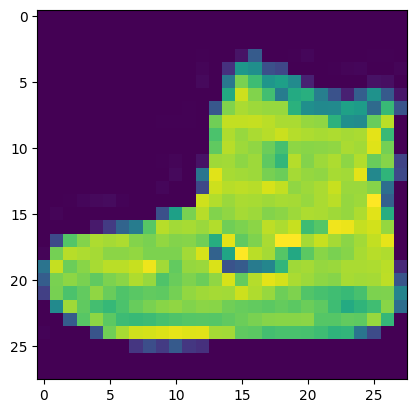

In [43]:

plt.imshow(train_dataset[0][0].squeeze())



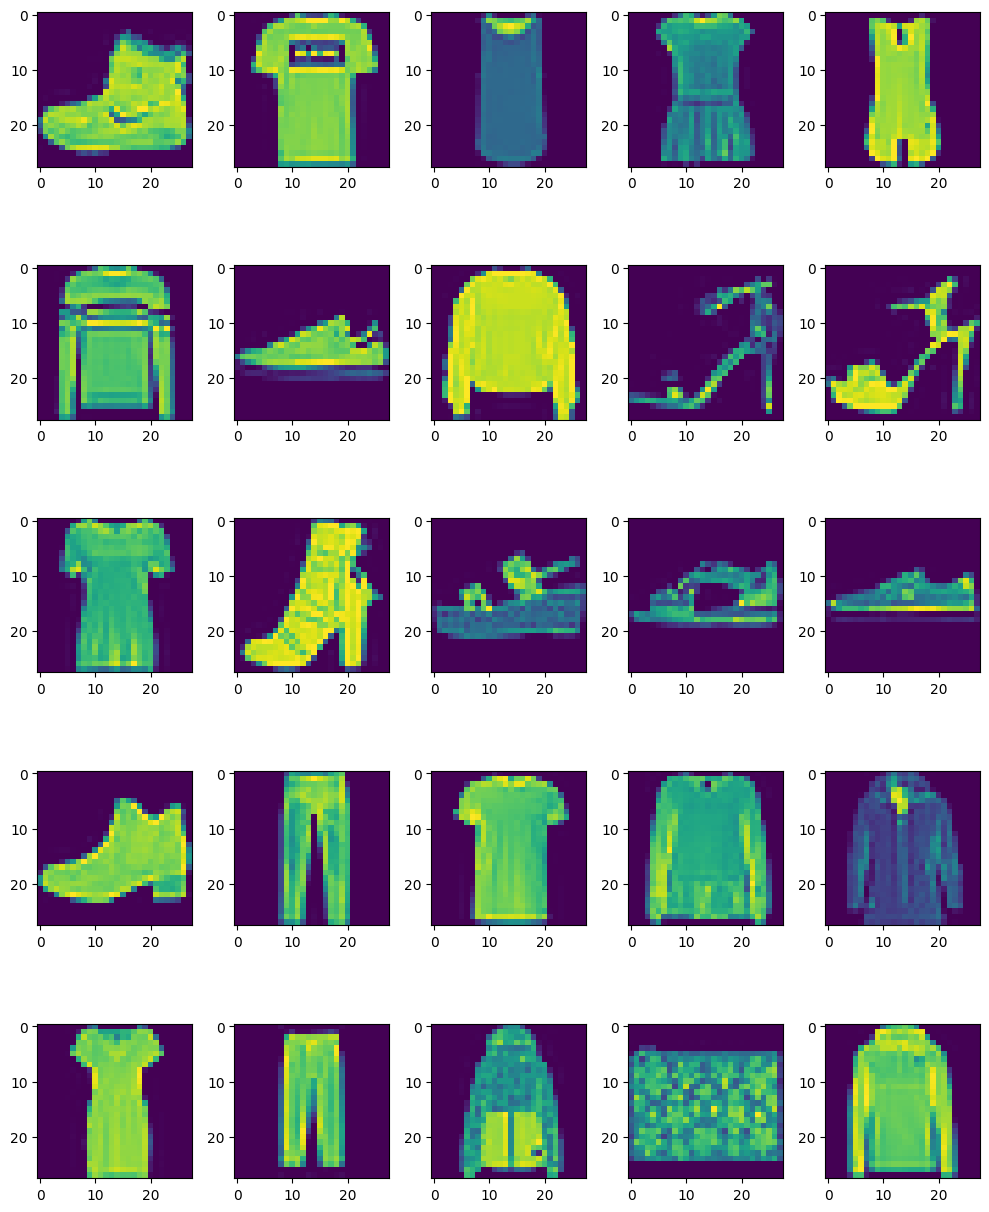

In [44]:
# show some of my train data

plt.figure(figsize=(10,14))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_dataset[i][0].squeeze())
    plt.tight_layout()

In [45]:
print(test_dataset[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

<br>
<br>

# `#01 Datapipeline And Convert  dataset into Batches: `

<br>
<br>

In [46]:

train_loader = DataLoader(dataset=train_dataset,batch_size=8,num_workers=2,shuffle=True)
test_loader = DataLoader(dataset=test_dataset,shuffle=False,batch_size=8,num_workers=2)

print(len(train_dataset)/8)
print(len(train_loader))
print()
print(len(test_dataset)/8)
print(len(test_loader))


7500.0
7500

1250.0
1250


In [47]:
show_train_data = iter(train_loader)
next(show_train_data)

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

<br>
<br>

# `02 Build a Logistic Model: `

<br>
<br>

In [48]:

class LogisticRegression(nn.Module):
    def __init__(self,in_dim,n_class):
        super().__init__()
        self.linear = nn.Linear(in_features=in_dim,out_features=n_class)
        
    def forward(self,x):
        out = self.linear(x)
        return out 
    
model = LogisticRegression(28*28,10)
model

LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [49]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0294,  0.0026, -0.0223,  ..., -0.0131,  0.0206,  0.0191],
         [ 0.0327, -0.0232,  0.0244,  ..., -0.0277, -0.0306,  0.0343],
         [-0.0129, -0.0240, -0.0116,  ..., -0.0009,  0.0104, -0.0138],
         ...,
         [ 0.0304, -0.0199, -0.0066,  ..., -0.0132,  0.0335,  0.0187],
         [-0.0094,  0.0279,  0.0309,  ...,  0.0222, -0.0142,  0.0231],
         [ 0.0127,  0.0186,  0.0252,  ...,  0.0204,  0.0286,  0.0112]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0050,  0.0060,  0.0318, -0.0226, -0.0239,  0.0046, -0.0124, -0.0349,
         -0.0057,  0.0287], requires_grad=True)]

In [50]:

model.state_dict()


OrderedDict([('linear.weight',
              tensor([[ 0.0294,  0.0026, -0.0223,  ..., -0.0131,  0.0206,  0.0191],
                      [ 0.0327, -0.0232,  0.0244,  ..., -0.0277, -0.0306,  0.0343],
                      [-0.0129, -0.0240, -0.0116,  ..., -0.0009,  0.0104, -0.0138],
                      ...,
                      [ 0.0304, -0.0199, -0.0066,  ..., -0.0132,  0.0335,  0.0187],
                      [-0.0094,  0.0279,  0.0309,  ...,  0.0222, -0.0142,  0.0231],
                      [ 0.0127,  0.0186,  0.0252,  ...,  0.0204,  0.0286,  0.0112]])),
             ('linear.bias',
              tensor([-0.0050,  0.0060,  0.0318, -0.0226, -0.0239,  0.0046, -0.0124, -0.0349,
                      -0.0057,  0.0287]))])

In [51]:
summary(model=model,input_size=(784,))

Layer (type:depth-idx)                   Output Shape              Param #
LogisticRegression                       [10]                      --
├─Linear: 1-1                            [10]                      7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03

<br>
<br>

# `#03 Change device cpu to gpu: `

<br>
<br>

In [52]:

# change device:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


'cpu'

In [53]:

model = model.to(device=device)


<br>
<br>

# `04 Choose a loss function and Optimizer: `

<br>
<br>

In [54]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.0001)

<br>
<br>

# `#05 Bulding a Traning Loop: `

<br>
<br>

In [55]:

show_train_data = iter(train_loader)
feature = next(show_train_data)[0]

In [56]:
from tqdm import tqdm


# Custom History Class for PyTorch
class History:
    def __init__(self) -> None:
        self.epoch_loss = []
        self.epoch_accuracies = []
        
    def update(self, loss, accuracy):
        self.epoch_loss.append(loss)
        self.epoch_accuracies.append(accuracy)
        
    def plot(self):
        plt.figure(figsize=(12, 6))
        epochs = range(1, len(self.epoch_loss) + 1)
        plt.plot(self.epoch_loss, label="Loss",  color='blue')
        plt.plot(self.epoch_accuracies,label="Accuracy")
        
        
        plt.xlabel("Epoch")
        plt.ylabel("Value")
        plt.title("Training Loss and Accuracy")
        plt.legend()
        plt.grid()
        plt.show()


# Train Model Function
def train_model(model, train_loader, criterion, optimizer, device, num_epoch):
    history = History()
    
    for epoch in range(num_epoch):
        print(f"Epoch: {epoch + 1}/{num_epoch}")
        
        since = time.time()
        training_loss = 0.0
        training_accuracy = 0.0
        model.train()
        
        # Use tqdm for progress bar
        progress_bar = tqdm(train_loader, desc="Training", leave=False, ncols=100)
        
        for i, data in enumerate(progress_bar):
            # Convert the image
            img, label = data
            # (batch_size,28*28) -> (8,784) (Flatten)
            img = img.view(img.size(0), -1).to(device)
            label = label.to(device)
            
            # <---- Forward Pass ---->
            # we get 10 probabilities:
            out = model(img)
            # Determine loss
            loss = criterion(out, label)
            # Accumulate loss # loss.item() convert tensor into numpy
            training_loss += loss.item()
            
            # Compute accuracy
            # for 1 picture we get, 10 pridicted values (probability)
            # height probability is our output
            # output size (8,10),(8,is our batch size)
            # we need last 10 number and from that we need maximum that's why we give 1,and maximizing
            # pred, we got 8 number, which indicate all maximum probabilites
            
            _, pred = torch.max(out, 1)
            training_accuracy += (pred == label).float().mean().item()
            
            
            # <---- Back Propagation ---->
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Update tqdm bar with current batch metrics
            progress_bar.set_postfix({
                "loss": training_loss / (i + 1),
                "accuracy": training_accuracy / (i + 1)
            })
        
        # Compute average loss and accuracy for the epoch
        avg_loss = training_loss / len(train_loader)
        avg_accuracy = training_accuracy / len(train_loader)
        
        # Update history
        history.update(loss=avg_loss, accuracy=avg_accuracy)
        
        # Print epoch summary
        print(f"Finish Epoch {epoch + 1}/{num_epoch}, Loss: {avg_loss:.6f}, Accuracy: {avg_accuracy:.6f}")
        
    # <------------------------------ Testing the model -------------------------->     
        
    # for testing, (backpropagation, normalization all the thing will deactivate)
        model.eval()

        eval_loss = 0.0
        eval_accur = 0.0

        for data in test_loader:
            img,label = data
            img = img.view(img.size(0),-1)
            img = img.to(device)
            label = label.to(device)
            
            """
            While traning a model we need to calcuate gradient, save gradient to update weight and bias.
            But in testing phase we don't need to calculate gradient. 
            For this, we use no_grad():
            """
            with torch.no_grad():
                out = model(img)
                loss = criterion(out,label)
            eval_loss += loss.item()
            _,pred = torch.max(out,1)
            eval_accur += (pred==label).float().mean()
            print(f"test loss: {eval_loss/len(test_loader):.6f}, test_accuracy: {eval_accur/len(test_loader):.6f}")
            print(f"time: {time.time()-since:.1f} s")
    return history



# <-----------------Calling the  Function--------------------->
history = train_model(
    model=model,
    train_loader=train_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epoch=10
)



Epoch: 1/10


Training:   0%|                       | 24/7500 [00:00<02:28, 50.47it/s, loss=2.24, accuracy=0.0491]

Finish Epoch 1/10, Loss: 0.783960, Accuracy: 0.748050
test loss: 0.000269, test_accuracy: 0.000800
time: 99.0 s
test loss: 0.000813, test_accuracy: 0.001400
time: 99.1 s
test loss: 0.001558, test_accuracy: 0.001900
time: 99.1 s
test loss: 0.002159, test_accuracy: 0.002400
time: 99.1 s
test loss: 0.002370, test_accuracy: 0.003200
time: 99.1 s
test loss: 0.002981, test_accuracy: 0.003700
time: 99.1 s
test loss: 0.004011, test_accuracy: 0.003800
time: 99.1 s
test loss: 0.004226, test_accuracy: 0.004600
time: 99.1 s
test loss: 0.004806, test_accuracy: 0.005200
time: 99.1 s
test loss: 0.005212, test_accuracy: 0.005800
time: 99.1 s
test loss: 0.005381, test_accuracy: 0.006600
time: 99.1 s
test loss: 0.005727, test_accuracy: 0.007300
time: 99.1 s
test loss: 0.006184, test_accuracy: 0.007900
time: 99.1 s
test loss: 0.006488, test_accuracy: 0.008600
time: 99.1 s
test loss: 0.006714, test_accuracy: 0.009300
time: 99.1 s
test loss: 0.006864, test_accuracy: 0.010100
time: 99.1 s
test loss: 0.00719

Finish Epoch 2/10, Loss: 0.547177, Accuracy: 0.817717


test loss: 0.000217, test_accuracy: 0.000800
time: 96.5 s
test loss: 0.000697, test_accuracy: 0.001400
time: 96.6 s
test loss: 0.001423, test_accuracy: 0.001800
time: 96.6 s
test loss: 0.001972, test_accuracy: 0.002300
time: 96.6 s
test loss: 0.002122, test_accuracy: 0.003100
time: 96.6 s
test loss: 0.002677, test_accuracy: 0.003600
time: 96.6 s
test loss: 0.003669, test_accuracy: 0.003700
time: 96.6 s
test loss: 0.003835, test_accuracy: 0.004400
time: 96.6 s
test loss: 0.004458, test_accuracy: 0.004900
time: 96.6 s
test loss: 0.004822, test_accuracy: 0.005600
time: 96.6 s
test loss: 0.004938, test_accuracy: 0.006400
time: 96.6 s
test loss: 0.005207, test_accuracy: 0.007100
time: 96.7 s
test loss: 0.005605, test_accuracy: 0.007700
time: 96.7 s
test loss: 0.005821, test_accuracy: 0.008500
time: 96.7 s
test loss: 0.006026, test_accuracy: 0.009200
time: 96.7 s
test loss: 0.006161, test_accuracy: 0.010000
time: 96.7 s
test loss: 0.006445, test_accuracy: 0.010700
time: 96.7 s
test loss: 0.0

Finish Epoch 3/10, Loss: 0.500811, Accuracy: 0.832783


test loss: 0.000196, test_accuracy: 0.000800
time: 91.9 s
test loss: 0.000592, test_accuracy: 0.001500
time: 91.9 s
test loss: 0.001302, test_accuracy: 0.002000
time: 91.9 s
test loss: 0.001815, test_accuracy: 0.002400
time: 91.9 s
test loss: 0.001923, test_accuracy: 0.003200
time: 91.9 s
test loss: 0.002405, test_accuracy: 0.003800
time: 91.9 s
test loss: 0.003406, test_accuracy: 0.004100
time: 92.0 s
test loss: 0.003532, test_accuracy: 0.004900
time: 92.0 s
test loss: 0.004176, test_accuracy: 0.005400
time: 92.0 s
test loss: 0.004664, test_accuracy: 0.006000
time: 92.0 s
test loss: 0.004778, test_accuracy: 0.006800
time: 92.1 s
test loss: 0.004975, test_accuracy: 0.007600
time: 92.1 s
test loss: 0.005371, test_accuracy: 0.008100
time: 92.1 s
test loss: 0.005548, test_accuracy: 0.008900
time: 92.1 s
test loss: 0.005760, test_accuracy: 0.009600
time: 92.1 s
test loss: 0.005856, test_accuracy: 0.010400
time: 92.1 s
test loss: 0.006101, test_accuracy: 0.011100
time: 92.1 s
test loss: 0.0

Finish Epoch 4/10, Loss: 0.476677, Accuracy: 0.839917


test loss: 0.000169, test_accuracy: 0.000800
time: 99.4 s
test loss: 0.000578, test_accuracy: 0.001500
time: 99.4 s
test loss: 0.001159, test_accuracy: 0.002100
time: 99.4 s
test loss: 0.001638, test_accuracy: 0.002700
time: 99.4 s
test loss: 0.001731, test_accuracy: 0.003500
time: 99.5 s
test loss: 0.002203, test_accuracy: 0.004100
time: 99.5 s
test loss: 0.003033, test_accuracy: 0.004400
time: 99.5 s
test loss: 0.003192, test_accuracy: 0.005100
time: 99.5 s
test loss: 0.003807, test_accuracy: 0.005600
time: 99.5 s
test loss: 0.004143, test_accuracy: 0.006300
time: 99.5 s
test loss: 0.004209, test_accuracy: 0.007100
time: 99.5 s
test loss: 0.004452, test_accuracy: 0.007800
time: 99.5 s
test loss: 0.004835, test_accuracy: 0.008500
time: 99.5 s
test loss: 0.004971, test_accuracy: 0.009300
time: 99.5 s
test loss: 0.005180, test_accuracy: 0.010000
time: 99.5 s
test loss: 0.005312, test_accuracy: 0.010700
time: 99.5 s
test loss: 0.005549, test_accuracy: 0.011400
time: 99.5 s
test loss: 0.0

Finish Epoch 5/10, Loss: 0.461118, Accuracy: 0.844967
test loss: 0.000154, test_accuracy: 0.000800
time: 74.1 s
test loss: 0.000530, test_accuracy: 0.001500
time: 74.1 s
test loss: 0.001100, test_accuracy: 0.002000
time: 74.1 s
test loss: 0.001570, test_accuracy: 0.002600
time: 74.1 s
test loss: 0.001661, test_accuracy: 0.003400
time: 74.1 s
test loss: 0.002097, test_accuracy: 0.004000
time: 74.1 s
test loss: 0.002934, test_accuracy: 0.004300
time: 74.1 s
test loss: 0.003086, test_accuracy: 0.005000
time: 74.1 s
test loss: 0.003734, test_accuracy: 0.005500
time: 74.1 s
test loss: 0.004094, test_accuracy: 0.006200
time: 74.1 s
test loss: 0.004154, test_accuracy: 0.007000
time: 74.1 s
test loss: 0.004372, test_accuracy: 0.007800
time: 74.1 s
test loss: 0.004759, test_accuracy: 0.008500
time: 74.1 s
test loss: 0.004891, test_accuracy: 0.009300
time: 74.1 s
test loss: 0.005096, test_accuracy: 0.010000
time: 74.1 s
test loss: 0.005231, test_accuracy: 0.010700
time: 74.1 s
test loss: 0.00545

Finish Epoch 6/10, Loss: 0.449756, Accuracy: 0.848517
test loss: 0.000168, test_accuracy: 0.000800
time: 65.5 s
test loss: 0.000510, test_accuracy: 0.001500
time: 65.5 s
test loss: 0.000963, test_accuracy: 0.002100
time: 65.5 s
test loss: 0.001433, test_accuracy: 0.002600
time: 65.6 s
test loss: 0.001510, test_accuracy: 0.003400
time: 65.6 s
test loss: 0.001934, test_accuracy: 0.004100
time: 65.6 s
test loss: 0.002604, test_accuracy: 0.004600
time: 65.6 s
test loss: 0.002737, test_accuracy: 0.005300
time: 65.6 s
test loss: 0.003360, test_accuracy: 0.005800
time: 65.6 s
test loss: 0.003619, test_accuracy: 0.006500
time: 65.6 s
test loss: 0.003666, test_accuracy: 0.007300
time: 65.6 s
test loss: 0.003949, test_accuracy: 0.008000
time: 65.6 s
test loss: 0.004282, test_accuracy: 0.008600
time: 65.6 s
test loss: 0.004394, test_accuracy: 0.009400
time: 65.6 s
test loss: 0.004634, test_accuracy: 0.010100
time: 65.6 s
test loss: 0.004755, test_accuracy: 0.010800
time: 65.6 s
test loss: 0.00498

Finish Epoch 7/10, Loss: 0.441323, Accuracy: 0.851200
test loss: 0.000149, test_accuracy: 0.000800
time: 62.8 s
test loss: 0.000476, test_accuracy: 0.001500
time: 62.8 s
test loss: 0.000965, test_accuracy: 0.002100
time: 62.8 s
test loss: 0.001405, test_accuracy: 0.002700
time: 62.8 s
test loss: 0.001478, test_accuracy: 0.003500
time: 62.8 s
test loss: 0.001871, test_accuracy: 0.004200
time: 62.8 s
test loss: 0.002576, test_accuracy: 0.004700
time: 62.8 s
test loss: 0.002704, test_accuracy: 0.005400
time: 62.8 s
test loss: 0.003364, test_accuracy: 0.005900
time: 62.8 s
test loss: 0.003668, test_accuracy: 0.006600
time: 62.9 s
test loss: 0.003716, test_accuracy: 0.007400
time: 62.9 s
test loss: 0.003943, test_accuracy: 0.008100
time: 62.9 s
test loss: 0.004307, test_accuracy: 0.008800
time: 62.9 s
test loss: 0.004429, test_accuracy: 0.009600
time: 62.9 s
test loss: 0.004641, test_accuracy: 0.010300
time: 62.9 s
test loss: 0.004763, test_accuracy: 0.011000
time: 62.9 s
test loss: 0.00497

Finish Epoch 8/10, Loss: 0.434189, Accuracy: 0.852617


test loss: 0.000127, test_accuracy: 0.000800
time: 98.9 s
test loss: 0.000452, test_accuracy: 0.001500
time: 98.9 s
test loss: 0.000977, test_accuracy: 0.002000
time: 98.9 s
test loss: 0.001401, test_accuracy: 0.002600
time: 99.0 s
test loss: 0.001469, test_accuracy: 0.003400
time: 99.0 s
test loss: 0.001867, test_accuracy: 0.004000
time: 99.0 s
test loss: 0.002688, test_accuracy: 0.004400
time: 99.0 s
test loss: 0.002811, test_accuracy: 0.005100
time: 99.0 s
test loss: 0.003497, test_accuracy: 0.005600
time: 99.0 s
test loss: 0.003912, test_accuracy: 0.006300
time: 99.0 s
test loss: 0.003963, test_accuracy: 0.007100
time: 99.0 s
test loss: 0.004134, test_accuracy: 0.007900
time: 99.1 s
test loss: 0.004550, test_accuracy: 0.008500
time: 99.1 s
test loss: 0.004666, test_accuracy: 0.009300
time: 99.1 s
test loss: 0.004848, test_accuracy: 0.010000
time: 99.1 s
test loss: 0.004958, test_accuracy: 0.010800
time: 99.1 s
test loss: 0.005139, test_accuracy: 0.011500
time: 99.1 s
test loss: 0.0

Finish Epoch 9/10, Loss: 0.428898, Accuracy: 0.854183


test loss: 0.000134, test_accuracy: 0.000800
time: 98.8 s
test loss: 0.000421, test_accuracy: 0.001500
time: 98.8 s
test loss: 0.000893, test_accuracy: 0.002100
time: 98.8 s
test loss: 0.001295, test_accuracy: 0.002700
time: 98.8 s
test loss: 0.001363, test_accuracy: 0.003500
time: 98.8 s
test loss: 0.001832, test_accuracy: 0.004100
time: 98.8 s
test loss: 0.002591, test_accuracy: 0.004600
time: 98.9 s
test loss: 0.002694, test_accuracy: 0.005400
time: 98.9 s
test loss: 0.003383, test_accuracy: 0.005900
time: 98.9 s
test loss: 0.003795, test_accuracy: 0.006600
time: 98.9 s
test loss: 0.003848, test_accuracy: 0.007400
time: 98.9 s
test loss: 0.004028, test_accuracy: 0.008100
time: 98.9 s
test loss: 0.004393, test_accuracy: 0.008700
time: 98.9 s
test loss: 0.004503, test_accuracy: 0.009500
time: 98.9 s
test loss: 0.004697, test_accuracy: 0.010200
time: 98.9 s
test loss: 0.004786, test_accuracy: 0.011000
time: 99.0 s
test loss: 0.004956, test_accuracy: 0.011700
time: 99.0 s
test loss: 0.0

Finish Epoch 10/10, Loss: 0.424128, Accuracy: 0.856317


test loss: 0.000134, test_accuracy: 0.000800
time: 97.3 s
test loss: 0.000416, test_accuracy: 0.001500
time: 97.3 s
test loss: 0.000881, test_accuracy: 0.002000
time: 97.3 s
test loss: 0.001279, test_accuracy: 0.002700
time: 97.3 s
test loss: 0.001338, test_accuracy: 0.003500
time: 97.3 s
test loss: 0.001699, test_accuracy: 0.004200
time: 97.3 s
test loss: 0.002398, test_accuracy: 0.004700
time: 97.4 s
test loss: 0.002519, test_accuracy: 0.005400
time: 97.4 s
test loss: 0.003178, test_accuracy: 0.005900
time: 97.4 s
test loss: 0.003493, test_accuracy: 0.006600
time: 97.4 s
test loss: 0.003529, test_accuracy: 0.007400
time: 97.4 s
test loss: 0.003727, test_accuracy: 0.008200
time: 97.4 s
test loss: 0.004092, test_accuracy: 0.008800
time: 97.4 s
test loss: 0.004211, test_accuracy: 0.009600
time: 97.5 s
test loss: 0.004416, test_accuracy: 0.010300
time: 97.5 s
test loss: 0.004531, test_accuracy: 0.011000
time: 97.5 s
test loss: 0.004721, test_accuracy: 0.011700
time: 97.5 s
test loss: 0.0

In [57]:
history.epoch_accuracies

[0.74805,
 0.8177166666666666,
 0.8327833333333333,
 0.8399166666666666,
 0.8449666666666666,
 0.8485166666666667,
 0.8512,
 0.8526166666666667,
 0.8541833333333333,
 0.8563166666666666]

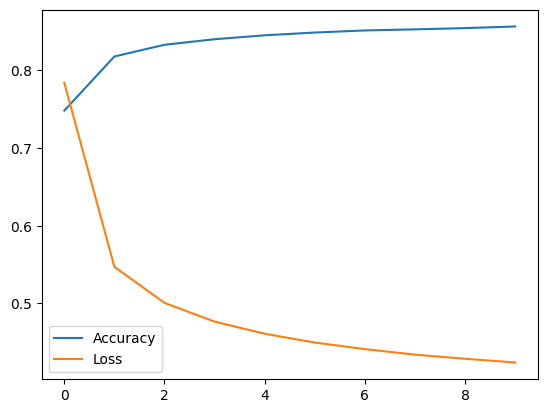

In [58]:

# <---------------------- Tranning Loss And Accuracy Curve ----------------------->
plt.plot(history.epoch_accuracies,label="Accuracy")
plt.plot(history.epoch_loss,label="Loss")
plt.legend()


<br>
<br>

# `#06 Visulize the Performance OF MY MODEL: `

<br>
<br>

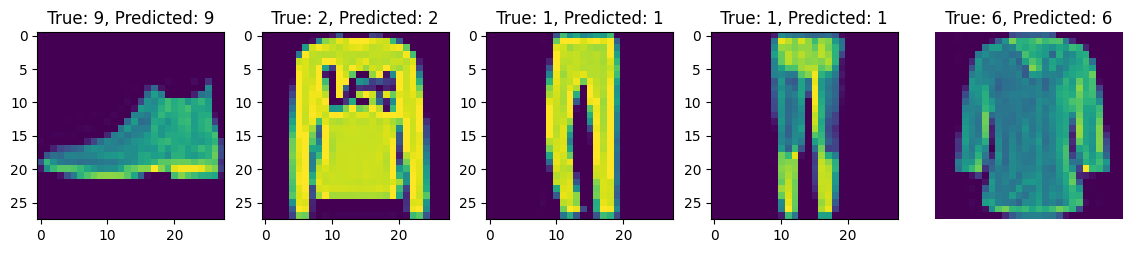

In [77]:

img,labels = next(iter(test_loader))
images = img.reshape(-1,28*28).to(device)
labels = labels.to(device)
outputs = model(images)
_,predicts = torch.max(outputs,1)
fix , ax = plt.subplots(nrows=1,ncols=5,figsize=(14,8))
plt.axis("off")
for i in range(5):
    ax[i].imshow(images[i].reshape(28,28))
    ax[i].set_title(f" True: {labels[i].item()}, Predicted: {predicts[i].item()} ")

